# `CARDIOVASCULAR DISEASE PROJECT`

#### This aim of this project is to develop a Machine Learning model to predict the likelihood of Cardiovasular diseases based on relevant health parameters.

## Data Description

|Attribute| Description| Data Type| Domain|
|----|----|----|----|
|Age| Patient age in year| Numerical| 29 to 77|
|Sex| Gender| Binary| 0 = female, 1 = male|
|Chest_pain| Chest pain type| Nominal| 1 = typical angina, 2 = atypical angina, 3 = nonanginal pain, 4 = asymptomatic|
|Rest_bps| Resting blood pressure| Numerical| 94 to 200| 
|Chol| Serum cholesterol| Numerical| 126 to 564|
|Blood_sugar| Fasting blood sugar >120 mg/đL| Binary| 0 = false, 1 = True|
|Rest_ecg| Resting electrocardiographic result| Nominal| 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hypertrophy|
|Max_heart_rate| Maximum heart rate| Numerical| 71 to 200|
|Ex_ang| Exercise induced angina| Binary| 0 = no, 1= yes|
|Old_peak| Old peak| Numerical| Continuous (0 to 6.2)|
|Slope| Slope of peak exercise ST segment| Nominal| 1 = upsloping, 2 = flat, 3 = downsloping|
|Vessel| Number of major vessels| Nominal| 0 to 3|
|Thal| Defect type| Nominal| 3 = normal, 6 = fixed defect, 7 = reversible defect|
|Target| Heart disease| Ordinal| 0 = very unlikely, 1 = unlikely, 2 = possible, 3 = likely, 4 = very likely|




In [ ]:
nom = df[['Gender', 'Chest_pain', 'Blood_sugar', 'Rest_ecg', 'Ex_ang', 'Slope', 'Vessel', 'Thal']]
num = df[['Age', 'Rest_bps', 'Chol', 'Max_heart_rate', 'Old_peak']]

## `Step 0:` Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pointbiserialr, chi2_contingency


## `Step 1:` Import the dataset to DataFrame

In [3]:
# Import csv file to dataframe

df = pd.read_csv('Cardio data.csv')

# Show a sample of the data

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,NaN,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0


## `Step 2:` Data Understanding

In [4]:
# Check the total rows and columns
df.shape

(1592, 14)

In [5]:
# Check the data types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps      int64
chol        float64
fbs         float64
restecg     float64
thalach       int64
exang       float64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
dtype: object

In [6]:
# Check column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# Adjust column names
df=df.rename(columns={'age':'Age', 'sex':'Sex', 'cp':'Chest_pain', 'trestbps':'Rest_bps', 'chol':'Chol', 'fbs':'Blood_sugar', 'restecg':'Rest_ecg', 'thalach':'Max_heart_rate',
       'exang':'Ex_ang', 'oldpeak':'Old_peak', 'slope':'Slope', 'ca':'Vessel', 'thal':'Thal', 'target':'Target'})

# Check to see changes

df.head(10)

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,NaN,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0
5,56.0,1.0,2.0,120,236.0,0.0,0.0,178,0.0,0.8,1.0,0,3.0,0
6,62.0,0.0,4.0,140,268.0,0.0,2.0,160,0.0,3.6,3.0,2,3.0,3
7,57.0,0.0,4.0,120,354.0,0.0,0.0,163,1.0,0.6,1.0,0,3.0,0
8,63.0,1.0,4.0,130,NaN,0.0,2.0,147,0.0,1.4,2.0,1,7.0,2
9,53.0,NaN,4.0,140,203.0,1.0,2.0,155,1.0,3.1,3.0,0,7.0,1


In [8]:
# Check for total missing values per feature

df.isna().sum()

Age                79
Sex                31
Chest_pain        159
Rest_bps            0
Chol               63
Blood_sugar        79
Rest_ecg            7
Max_heart_rate      0
Ex_ang             47
Old_peak           31
Slope              54
Vessel              0
Thal                7
Target              0
dtype: int64

In [9]:
# Handle missing data based on the feature

def handle_missing_data(df):
    # Fill missing numerical data with the mean of the column
    for column in ['Age', 'Rest_bps', 'Chol', 'Max_heart_rate', 'Old_peak']:
        df[column].fillna(df[column].mean(), inplace=True)
    
    # Fill missing binary and nominal data with the mode of the column
    for column in ['Sex', 'Chest_pain', 'Blood_sugar', 'Rest_ecg', 'Ex_ang', 'Slope', 'Thal']:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    # Check if there are any remaining missing values
    missing_data = df.isnull().sum()
    return df, missing_data

handle_missing_data(df)

(       Age  Sex  Chest_pain  Rest_bps   Chol  Blood_sugar  Rest_ecg  \
 0     63.0  1.0         1.0       145  233.0          1.0       2.0   
 1     67.0  1.0         4.0       160  286.0          0.0       2.0   
 2     67.0  1.0         4.0       120  229.0          0.0       2.0   
 3     37.0  1.0         3.0       130  250.0          0.0       0.0   
 4     41.0  0.0         2.0       130  204.0          0.0       2.0   
 ...    ...  ...         ...       ...    ...          ...       ...   
 1587  52.0  1.0         3.0       172  199.0          1.0       0.0   
 1588  44.0  1.0         2.0       120  263.0          0.0       0.0   
 1589  56.0  0.0         0.0       140  294.0          0.0       2.0   
 1590  57.0  1.0         4.0       140  192.0          0.0       0.0   
 1591  67.0  1.0         4.0       160  286.0          0.0       2.0   
 
       Max_heart_rate  Ex_ang  Old_peak  Slope  Vessel  Thal  Target  
 0                150     0.0  2.300000    3.0       0   6.0   

In [10]:
# Confirm results

df.isna().sum()

Age               0
Sex               0
Chest_pain        0
Rest_bps          0
Chol              0
Blood_sugar       0
Rest_ecg          0
Max_heart_rate    0
Ex_ang            0
Old_peak          0
Slope             0
Vessel            0
Thal              0
Target            0
dtype: int64

The missing values have been sorted using mean for numerical values and mode for nominal ones

In [11]:
df.duplicated().sum()

559

In [12]:
# Drop duplicates excpet first occurence
df = df.drop_duplicates()

In [13]:
# Checking total number of duplicates
df.duplicated().sum()

0

In [14]:
# Reset index to represent actual DataFrame after removing duplicates
df = df.reset_index(drop=True)
df

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.300000,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,1.066496,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.600000,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,0.0,187,0.0,3.500000,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.400000,1.0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,52.0,1.0,3.0,172,199.0,1.0,0.0,162,0.0,0.500000,1.0,0,7.0,1
1029,44.0,1.0,2.0,120,263.0,0.0,0.0,173,0.0,0.000000,1.0,0,7.0,1
1030,56.0,0.0,0.0,140,294.0,0.0,2.0,153,0.0,1.300000,2.0,0,3.0,1
1031,57.0,1.0,4.0,140,192.0,0.0,0.0,148,0.0,0.400000,2.0,0,6.0,1


The duplicated rows have been dropped successfully

In [15]:
# Convert each feature to it's data type
data_types = {
    'Age': float,
    'Sex': int,
    'Chest_pain': int,
    'Rest_bps': int,
    'Chol': float,
    'Blood_sugar': int,
    'Rest_ecg': int,
    'Max_heart_rate': int,
    'Ex_ang': int,
    'Old_peak': float,
    'Slope': int,
    'Vessel': int,
    'Thal': int,
    'Target': int
}

df = df.astype(data_types)

In [16]:
# View DataFrame

df.head()


,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
0,63.0,1,1,145,233.0,1,2,150,0,2.300000,3,0,6,0
1,67.0,1,4,160,286.0,0,2,108,1,1.066496,2,3,3,2
2,67.0,1,4,120,229.0,0,2,129,1,2.600000,2,2,7,1
3,37.0,1,3,130,250.0,0,0,187,0,3.500000,3,0,3,0
4,41.0,0,2,130,204.0,0,2,172,0,1.400000,1,0,3,0


## `Step 3:` Feature Understanding (EDA)

This process is to understand each feature (univariate analysis)

In [17]:
# Check statistical information of the dataset now that missing values and duplicates have been handled

df.describe()

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,54.283570,0.688287,1.901258,131.547919,246.874590,0.137464,0.792836,150.313650,0.306873,1.036587,1.476283,0.682478,3.585673,0.880929
std,8.762865,0.463418,1.543908,17.820103,49.818472,0.344503,0.844308,22.873014,0.461420,1.139899,0.625422,0.965416,1.888528,0.856097
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.427627,1.000000,2.000000,130.000000,245.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,271.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


Text(0, 0.5, 'Frequency')

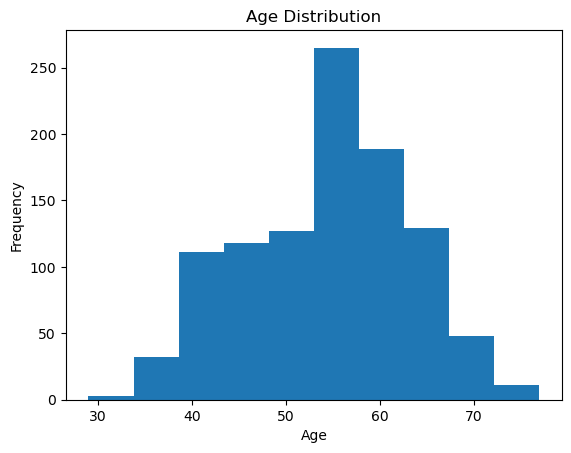

In [18]:
# Age

ax=df['Age'].plot(kind='hist', title='Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Count')

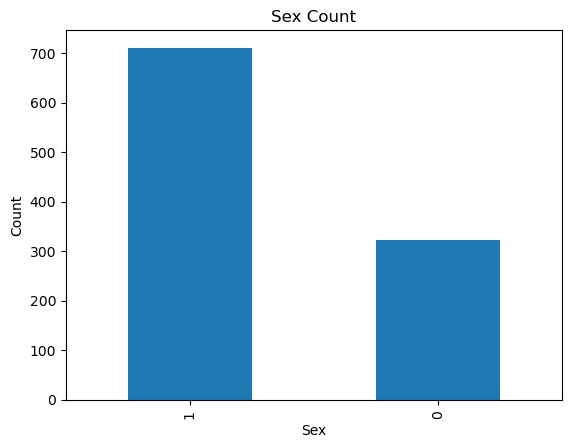

In [19]:
# Sex

ax=df['Sex'].value_counts().plot(kind='bar', title='Sex Count')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

There are more Males than Females

In [20]:
# Chest Pain Types
df.isna().sum()
#df['Chest_pain'].value_counts()

Age               0
Sex               0
Chest_pain        0
Rest_bps          0
Chol              0
Blood_sugar       0
Rest_ecg          0
Max_heart_rate    0
Ex_ang            0
Old_peak          0
Slope             0
Vessel            0
Thal              0
Target            0
dtype: int64

Notice that 0 does not have a special value and is thus an error we must deal with 

In [21]:
num_rows_with_zero = (df['Chest_pain'] == 0).sum()
print("Total number of rows with value 0 in 'Chp' column:", num_rows_with_zero)

Total number of rows with value 0 in 'Chp' column: 315


There are 315 samples with the value 0 which is undefined. 315 is a lot of valuable information to drop from the dataset so we can replace them similar to missing values

In [22]:
# Replace 0 with NaN values
df['Chest_pain'].replace(0, np.nan, inplace=True)

# Impute missing values in 'Chp' column using mode imputation
chp_mode = int(df['Chest_pain'].mode()[0])

# FIll NaN values with the mode because the data is nominal
df['Chest_pain'].fillna(chp_mode, inplace=True)

df['Chest_pain'] = df['Chest_pain'].astype(int)

df['Chest_pain'].head()



0    1
1    4
2    4
3    3
4    2
Name: Chest_pain, dtype: int32

Text(0, 0.5, 'Chest Pain')

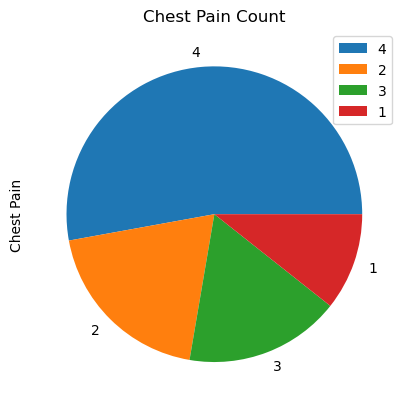

In [23]:
ax = df['Chest_pain'].value_counts().plot(kind='pie', title='Chest Pain Count', legend=True)
ax.set_ylabel('Chest Pain')

Frequency of Chest pain based on the type:
1 = typical angina, 2 = atypical angina, 3 = nonanginal pain, 4 = asymptomatic

Asymptomatic has the highest count with 546 patients

<Axes: ylabel='Frequency'>

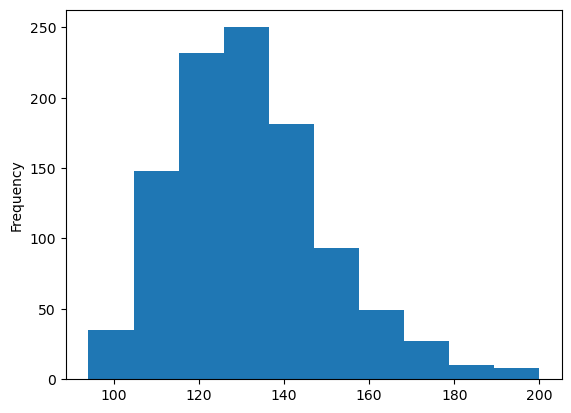

In [24]:
# Resting Blood Pressure
df['Rest_bps'].plot(kind='hist', title='')

Text(0, 0.5, 'Frequency')

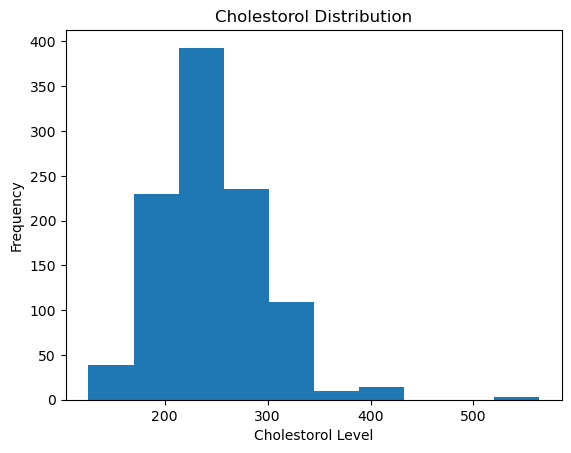

In [25]:
# Cholestorol level

ax=df['Chol'].plot(kind='hist', title='Cholestorol Distribution')
ax.set_xlabel('Cholestorol Level')
ax.set_ylabel('Frequency')


## `Step 4:` Feature Relationship

Finding the relationships between the features to identify the best feature for building a prediction model

`Numerical Values` Numerical values are best handled using correlation statistics or scatterplots to visualize the data

The Numerical Features in the dataset are: Age, Rest_bps, Chol, Max_heart_rate and Old_peak

In [26]:
# Dataframe for numerical features
num_features = df[['Age', 'Rest_bps', 'Chol', 'Max_heart_rate', 'Old_peak']]


In [27]:
# Calculate Spearman rank correlation for numerical features with ordinal target variable 'Class'

sp_corr = num_features.corrwith(df['Target'], method='spearman').abs()

sp_corr

Age               0.038255
Rest_bps          0.023581
Chol              0.040888
Max_heart_rate    0.068602
Old_peak          0.076960
dtype: float64

Result - Weak positive correlation with Old Peak having the most effect. An increase in these features will lead to an increase in likelihood of cardiovascular diseases albeit slight.

`Binary Features:` Columns with binary features (0,1)

In [28]:
# Dataframe for binary features 

bin_features = df[['Sex', 'Blood_sugar', 'Ex_ang']]

In [29]:
# Calculate and print point-biserial correlation coefficients
for feature in bin_features:
    corr_coef, _ = pointbiserialr(df[feature], df['Target'])
    print(f"{feature}: {corr_coef}")

Sex: 0.052901513147435464
Blood_sugar: 0.006268892130046038
Ex_ang: 0.11957352439884299


In [30]:
# Define nominal features
nomi_features = df[['Chest_pain', 'Rest_ecg', 'Slope', 'Vessel', 'Thal']]

In [31]:
# Perform chi-square test for each nominal feature
chi2_results = {}
for feature in nomi_features:
    # Create contingency table with frequencies for each category in the feature and 'Class'
    contingency_table = pd.crosstab(df[feature], df['Target'])
    
    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store chi-square statistic and p-value in results dictionary
    chi2_results[feature] = {'chi2': chi2, 'p_value': p_value}

# Sort the nominal features based on p-value in ascending order
sorted_features = sorted(chi2_results.items(), key=lambda x: x[1]['p_value'])

for feature, result in sorted_features:
    print(f"{feature}: Chi-square = {result['chi2']}, p-value = {result['p_value']}")


Thal: Chi-square = 522.1195930617754, p-value = 6.749059246899868e-98
Rest_ecg: Chi-square = 171.16413209748205, p-value = 7.353407814304064e-33
Vessel: Chi-square = 174.97673617857586, p-value = 8.536238022315468e-29
Chest_pain: Chi-square = 130.27428023506778, p-value = 5.437108745674303e-22
Slope: Chi-square = 126.79158542895871, p-value = 2.714831653167445e-21


In order of significance, Defect type plays the most significant role in the likelihood of cardiovascular diseases 

##### FEATURES SELECTED

|Feature| Significance|
|-------|--------|
|Thal (Nominal)| Extremely strong association with the target variable|
|Rest_ecg (Nominal)| Strong association with the target variable|
|Vessel (Nominal)| Strong association with the target variable|
|Ex_ang (Binary)| Moderate association with the target variable|
|Max_heart_rate (Numerical)| Moderate association with the target variable|
|Old_peak (Numerical)| Moderate association with the target variable|

In [60]:
Selected_features = df[['Thal', 'Rest_ecg', 'Vessel', 'Ex_ang', 'Max_heart_rate', 'Old_peak']]

nom = df[['Sex', 'Chest_pain', 'Blood_sugar', 'Rest_ecg', 'Ex_ang', 'Slope', 'Vessel', 'Thal']]
num = df[['Age', 'Rest_bps', 'Chol', 'Max_heart_rate', 'Old_peak']]

## ``Step 5``: Model Selection

Project objective: Predict the likelihood of cardiovascular diseases\
\
Predictor: Thal, Resting Blood Pressure, Blood vessel, Exercise angine, Maximum heart rate and Old peak\
\
Target: 0 = very unlikely, 1 = unlikely, 2 = possible, 3 = likely, 4 = very likely \
\
Problem type: Classification

### Split Dataset

In [46]:
# Create X and Y - Predictor and Target Variable

X = Selected_features
y = df['Target']

# Split into Training and Testing set for prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model

Logistic Regression can handle numerical and binary features effectively.

In [47]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train/ fit the model
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5700483091787439


### Decision Tree and Random Forests

Decision Trees and Random Forests can handle mixed data types including numerical and nominal features without requiring extensive preprocessing.

In [49]:
# Initialize decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the Classifier
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree.predict(X_test)

In [50]:
# Evaluate the performance of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.5072463768115942


#### Random Forests

In [51]:
# Initialize and train the random forest classifier
random_forest = RandomForestClassifier()

# Train the Classifier
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest.predict(X_test)

In [52]:

# Evaluate the performance of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.5362318840579711


### Support Vector Machines

In [64]:
# Re-Select features (X) and target variable (y)
X = Selected_features
Y = df['Target']


# Scaling only numerical features# Feature scaling for numerical features
scaler = StandardScaler()
numerical_features = df[['Old_peak', 'Max_heart_rate']]

numerical_features = scaler.fit_transform(numerical_features)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', random_state=42)  # You can choose different kernel functions ('linear', 'rbf', 'poly', etc.)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.45893719806763283
              precision    recall  f1-score   support

           0       0.36      0.25      0.29        73
           1       0.49      0.82      0.61        94
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3

    accuracy                           0.46       207
   macro avg       0.17      0.21      0.18       207
weighted avg       0.35      0.46      0.38       207



c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' kernel
}

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Perform Grid Search with cross-validation
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

# Evaluate the best model on the testing set
svm_accuracy = best_model_svm.score(X_test, y_test)
print("Best SVM Model Accuracy:", svm_accuracy)
print("Best SVM Model Hyperparameters:", best_params_svm)


Best SVM Model Accuracy: 0.5555555555555556
Best SVM Model Hyperparameters: {'C': 100, 'gamma': 'scale'}
